# Principal component analysis country HELP dataset

Some ML algorithms struggle with highly-correlated features. PCA transforms correlated features into uncorrelated components, which could be easier for your algorithm to work with.

Principal Component Analysis (PCA), is an often used dimensionality-reduction method to reduce the dimensionality of data sets, by transforming a set of variables (features) into a smaller one that still contains most of the information in the original set. Such reduced sets are easier to explore and visualize and make analyzing data easier and faster for machine learning algorithms.

Reducing the number of variables of a data set comes at the expense of accuracy, but the trick in dimensionality reduction is to trade only a little accuracy for simplicity.

* [Importing libraries and packages](#importing)
* [Set paths](#set-paths)
* [Loading data](#loading-data)
* [Standardize the range of continuous initial variables](#standardize)
* [Compute the covariance matrix to identify correlations](#covariance)
* [Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components](#identify)
* [Create a feature vector with principal components to keep](#vector)
* [Recast the data along the principal components axes](#recast)
* [PCA conclusions](#conlusions-pca)

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Warnings
import warnings

# mathematical operations and data manipulation
import numpy as np
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# scaling
from sklearn.preprocessing import StandardScaler

# principal component analysis
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "../datasets"
# Path to assets directory (for saving results to)
assets_path = "../assets"

<a id="loading-data"></a>
## Loading data

In [3]:
data_country = pd.read_csv(f"{data_path}/Country-data.csv")
# Shape of the dataset
print("Shape of the Country dataset: ", data_country.shape)
data_country.head()

Shape of the Country dataset:  (167, 10)


country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

<a id="standardize"></a>
## Standardize the range of continuous initial variables

If there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges, which will lead to biased results. The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

Mathematically, this can be done by [subtracting the mean and dividing by the standard deviation for each value of each variable](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [4]:
# Drop categorical columns
dataset = data_country.drop(["country"], axis=1)

In [5]:
# Standard scaler: Each feature of the data should be normally
# distributed such that it will scale the distribution to a
# mean of zero and a standard deviation of one.
columns = dataset.columns
scaler = StandardScaler()
rescaled_dataset_standard = scaler.fit_transform(dataset)
rescaled_dataset_standard

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [6]:
df_standard = pd.DataFrame(data=rescaled_dataset_standard, columns=columns)
df_standard

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

In [7]:
df_standard.to_csv(f"{data_path}/Country-data-scaled.csv", index=False)

In [8]:
df_standard.shape

(167, 9)

In [9]:
# Check whether the normalized data has means of (close to) zero and
# standard deviations of one
np.mean(df_standard), np.std(df_standard)

(child_mort   -2.659217e-17
 exports       2.383323e-16
 health        5.218713e-16
 imports       2.871954e-16
 income       -7.512288e-17
 inflation     3.988825e-18
 life_expec    3.616535e-16
 total_fer     3.124580e-16
 gdpp          2.127373e-17
 dtype: float64,
 child_mort    1.0
 exports       1.0
 health        1.0
 imports       1.0
 income        1.0
 inflation     1.0
 life_expec    1.0
 total_fer     1.0
 gdpp          1.0
 dtype: float64)

<a id="covariance"></a>
## Compute the covariance matrix to identify correlations

Variables can be highly correlated in such a way that they contain redundant information. To identify these correlations, compute the covariance matrix.

The [covariance matrix is a p × p symmetric matrix](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html), where p is the number of dimensions (features) that has as entries the covariances associated with all possible pairs of the initial variables.

Since the covariance of a variable with itself is its variance (Cov(a,a)=Var(a)), in the main diagonal (Top left to bottom right) we actually have the variances of each initial variable. And since the covariance is commutative (Cov(a,b)=Cov(b,a)), the entries of the covariance matrix are symmetric with respect to the main diagonal, which means that the upper and the lower triangular portions are equal.

A [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

<AxesSubplot:>

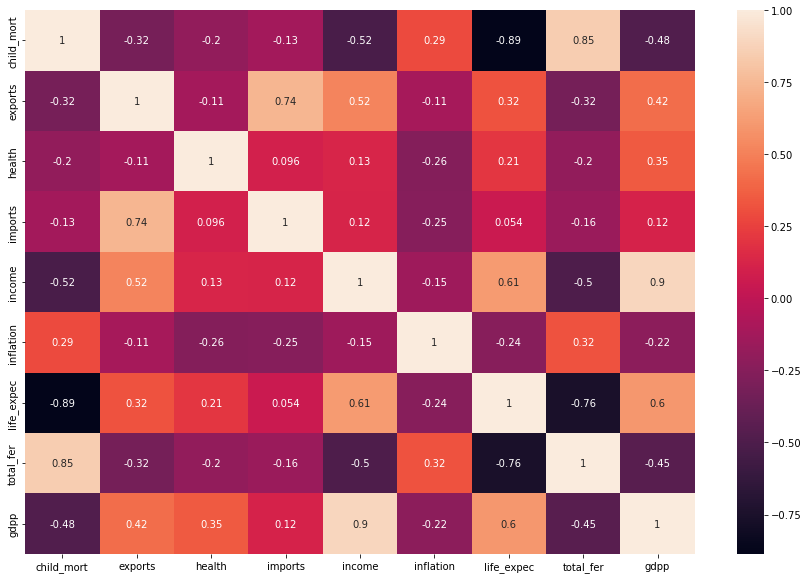

In [10]:
# Using Pearson’s product moment coefficient (numerical data, parametric,
# assuming the variables are normally distributed and the relationship
# between them is linear)
plt.figure(figsize=(15, 10))
sns.heatmap(data_country.corr(method="pearson", min_periods=1), annot=True)

<AxesSubplot:>

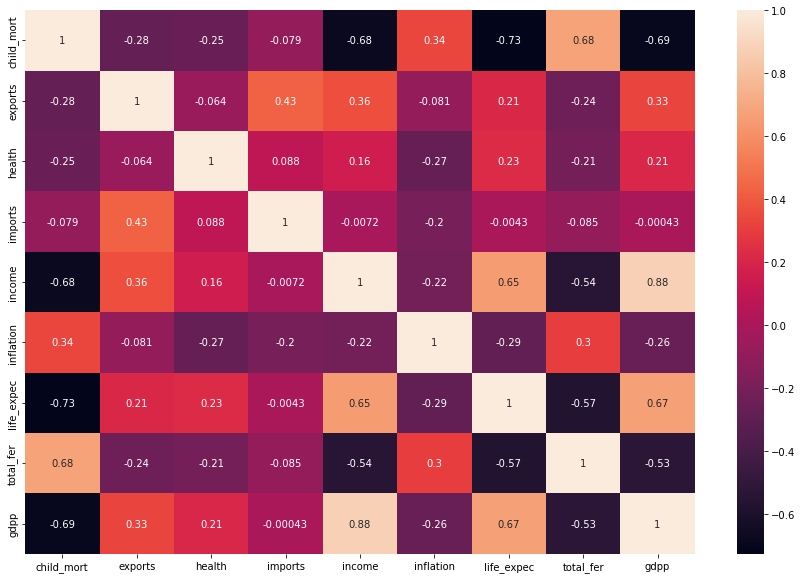

In [11]:
# Using Kendall (non-parametric)
plt.figure(figsize=(15, 10))
sns.heatmap(data_country.corr(method="kendall", min_periods=1), annot=True)

<AxesSubplot:>

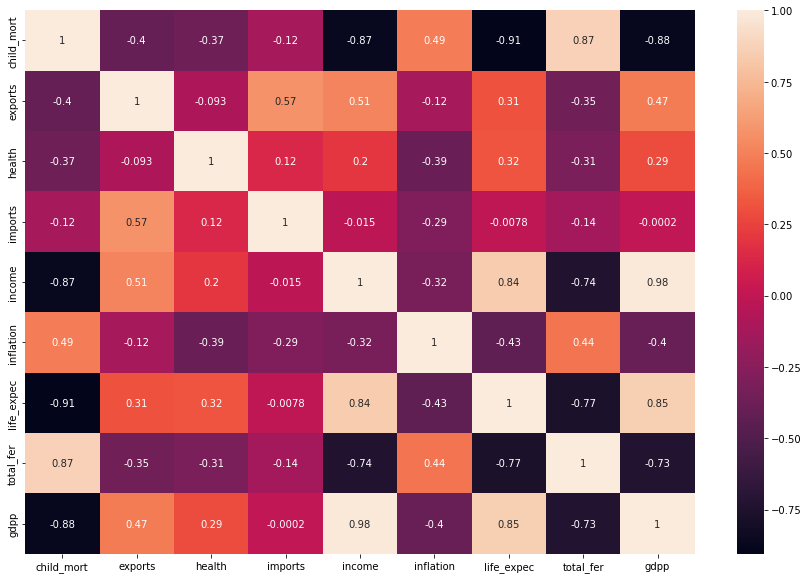

In [12]:
# Using Spearman (non-parametric)
plt.figure(figsize=(15, 10))
sns.heatmap(data_country.corr(method="spearman", min_periods=1), annot=True)

<a id="identify"></a>
## Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components

Eigenvectors and eigenvalues need to be computed from the covariance matrix in order to determine the principal components of the data.

Principal components are new variables that are constructed as linear combinations or mixtures of the original variables. These combinations are done in such a way that the new variables (the principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) tries to put maximum possible information in the first component, then maximum remaining information in the second and so on, which can be shown in a scree plot.

In [13]:
# Fit and transform
pca = PCA()
pca.fit(df_standard)
pca_data_standard = pca.transform(df_standard)

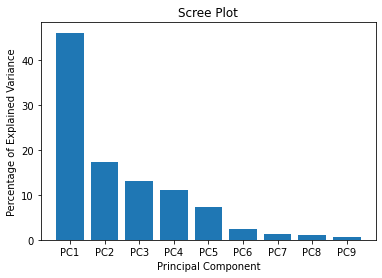

In [14]:
# Percentage variation
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ["PC" + str(x) for x in range(1, len(per_var) + 1)]

# Plot the percentage of explained variance by principal component
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

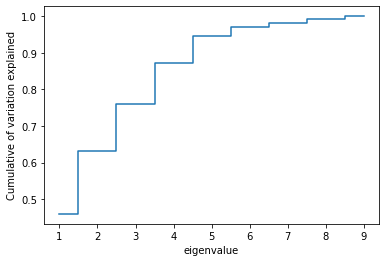

In [15]:
plt.step(
    list(range(1, len(per_var) + 1)),
    np.cumsum(pca.explained_variance_ratio_),
    where="mid",
)
plt.ylabel("Cumulative of variation explained")
plt.xlabel("eigenvalue")
plt.show()

Text(0, 0.5, 'PC2 - 17.2%')

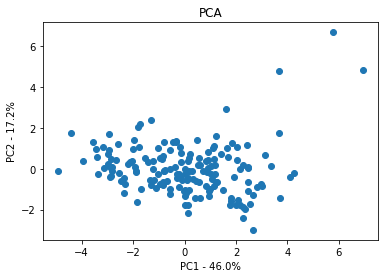

In [16]:
# Plot pca
pca_df_standard = pd.DataFrame(pca_data_standard, columns=labels)
plt.scatter(pca_df_standard.PC1, pca_df_standard.PC2)
plt.title("PCA")
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))

<a id="vector"></a>
## Create a feature vector with principal components to keep

Computing the eigenvectors and ordering them by their eigenvalues in descending order, gives the principal components in order of significance. Next is choosing whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form the feature vector, the matrix that has as columns the eigenvectors of the components that are kept.

Note: if we just want to describe the data in terms of new variables (principal components) that are uncorrelated without seeking to reduce dimensionality, leaving out lesser significant components is not needed.

In [17]:
# We decided on keeping the first four components, losing only 4% of
# the information
data2 = pca_df_standard.drop(["PC5", "PC6", "PC7", "PC8", "PC9"], axis=1)
data2

PC1       PC2       PC3       PC4
0   -2.913025  0.095621 -0.718118  1.005255
1    0.429911 -0.588156 -0.333486 -1.161059
2   -0.285225 -0.455174  1.221505 -0.868115
3   -2.932423  1.695555  1.525044  0.839625
4    1.033576  0.136659 -0.225721 -0.847063
..        ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595
163 -0.551036 -1.233886  3.101350 -0.115311
164  0.498524  1.390744 -0.238526 -1.074098
165 -1.887451 -0.109453  1.109752  0.056257
166 -2.864064  0.485998  0.223167  0.816364

[167 rows x 4 columns]

In [18]:
data2.to_csv(f"{data_path}/Country-data-components.csv", index=False)

<a id="recast"></a>
## Recast the data along the principal components axes

In the previous steps, apart from the standardization, no changes were made on the data. The principal components were selected and the feature vector created, but the input data set remains always in terms of the original axes (i.e, in terms of the initial variables).

In this step, the aim is to use the feature vector to reorient the data from the original axes to the ones represented by the principal components. This can be done by multiplying the transpose of the original data set by the transpose of the feature vector.

final_data = df_standard.transpose().multiply(data2.transpose())???

<a id="conlusions-pca"></a>
## PCA conlusions

* life_expec(t) has a high negative correlation with child_mort(ality)
* total_fer(tility) has a high positive correlation with child_mort(ality)
* income has a high positive correlation with gdpp
* Four principal components can explain about 96% of the distribution of the original data